In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [11]:
# Load the loan approval dataset
loan_df = pd.read_csv("loan_approval_data.csv")

In [12]:
# Drop unique identifier as it does not contribute to prediction
loan_df.drop(columns=['Applicant_ID'], axis=1)

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.0,43563.0,8311.0,72.0,Personal,NaN,Not Graduate,Male,Unemployed,No
996,3279.0,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,NaN,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,15192.0,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.0,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,9083.0,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.0,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [13]:
# Identify numerical columns (float type) to handle missing values
# separately using appropriate numerical imputation strategies
num_mis_val = loan_df.select_dtypes(include=['float64']).columns

# Identify categorical columns (object type) for separate
# categorical missing value treatment (e.g., mode imputation)
cat_mis_val = loan_df.select_dtypes(include=['object']).columns

In [14]:
# i learnt this new method of filling the missing value

# Handle missing values using SimpleImputer
# Numerical features are imputed with the mean to preserve overall distribution
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns
num_imp = SimpleImputer(strategy='mean')
loan_df[num_mis_val] = num_imp.fit_transform(loan_df[num_mis_val])

# Impute missing values in categorical columns
# Most frequent value (mode) is used to retain category consistency
cat_imp = SimpleImputer(strategy='most_frequent')
loan_df[cat_mis_val] = cat_imp.fit_transform(loan_df[cat_mis_val])


# EDA- Exploratory Data Analysis


Text(0.5, 1.0, 'Loan Approved')

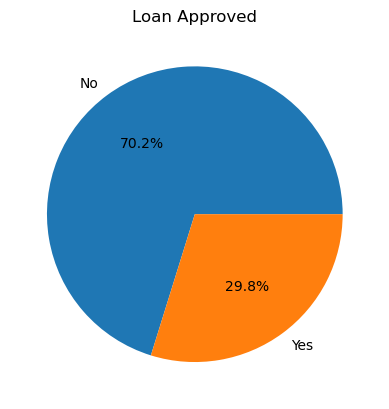

In [15]:
# knowing how balanced our classes are?
class_cont=loan_df['Loan_Approved'].value_counts()
plt.pie(
    class_cont,labels=['No','Yes'],autopct='%1.1f%%'
)
plt.title('Loan Approved')

<Axes: xlabel='Applicant_Income', ylabel='Count'>

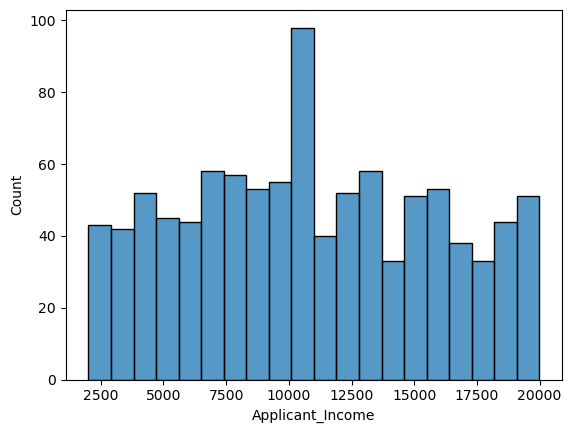

In [16]:
# analyze income
sns.histplot(
    data= loan_df,
    x='Applicant_Income',
    bins=20
)

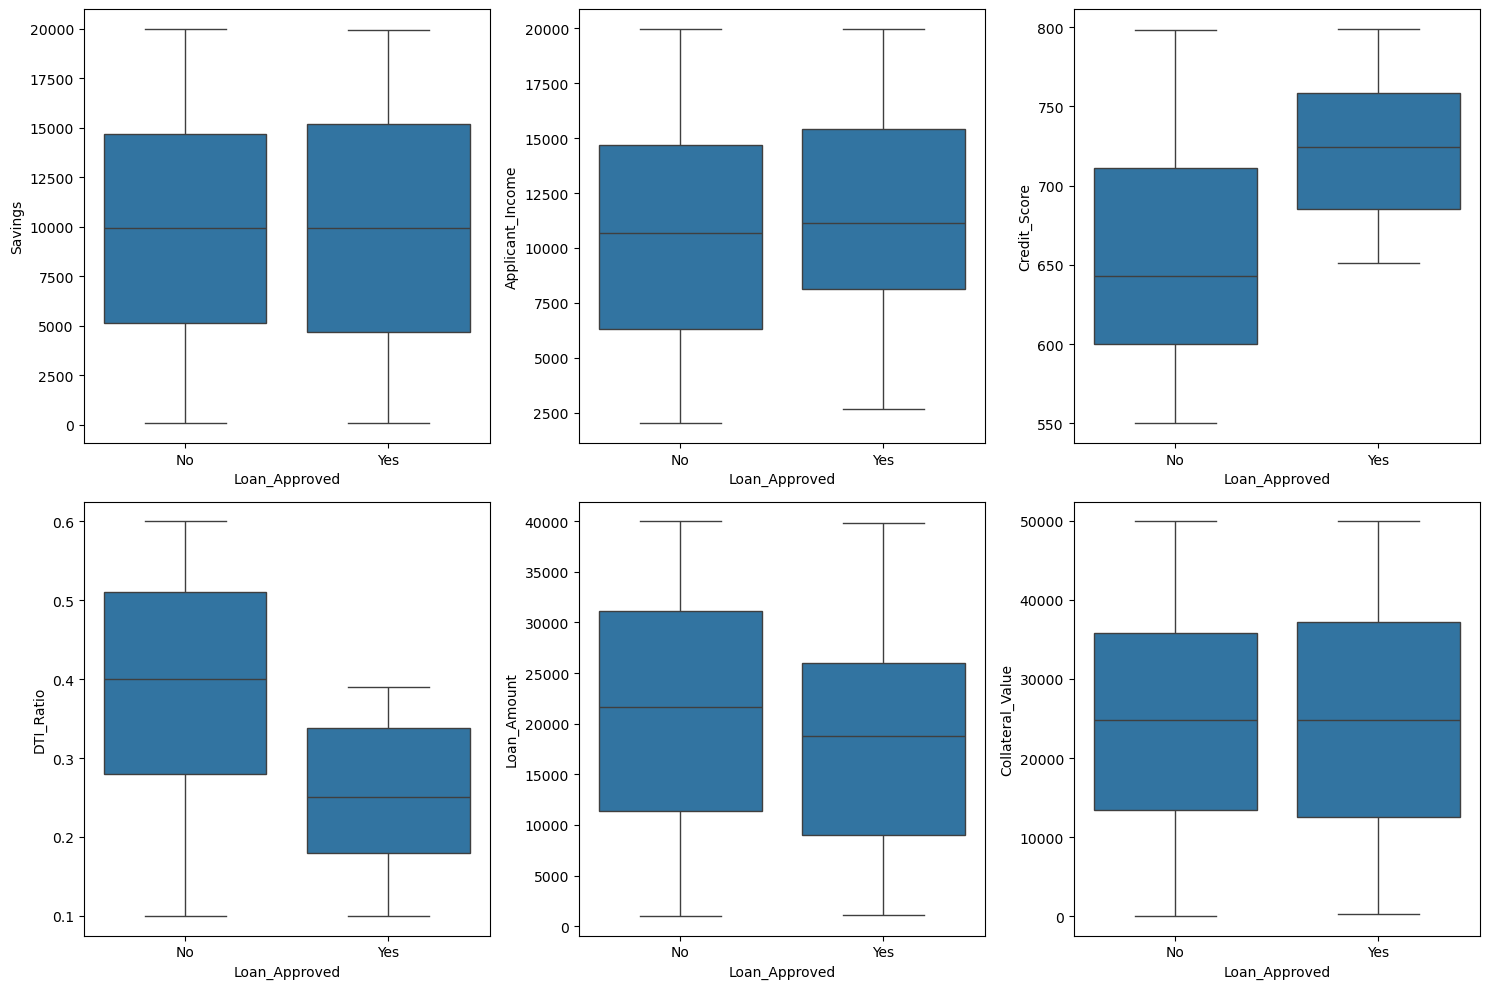

In [17]:
# outliers detection
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=loan_df, x='Loan_Approved', y='Savings')
sns.boxplot(ax=axes[0, 1], data=loan_df, x='Loan_Approved', y='Applicant_Income')
sns.boxplot(ax=axes[0, 2], data=loan_df, x='Loan_Approved', y='Credit_Score')

sns.boxplot(ax=axes[1, 0], data=loan_df, x='Loan_Approved', y='DTI_Ratio')
sns.boxplot(ax=axes[1, 1], data=loan_df, x='Loan_Approved', y='Loan_Amount')
sns.boxplot(ax=axes[1, 2], data=loan_df, x='Loan_Approved', y='Collateral_Value')

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

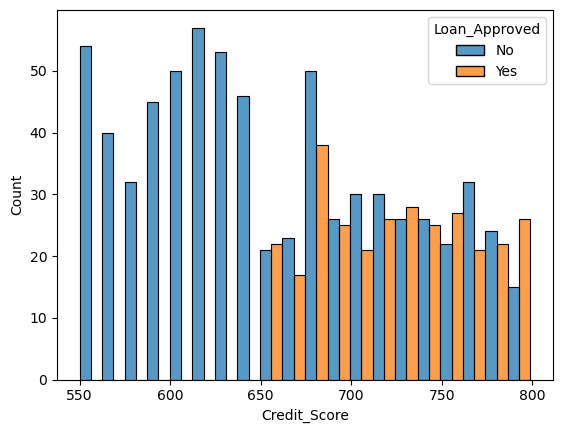

In [18]:
# Credit Score with loan approved 
sns.histplot(
    data=loan_df,
    x='Credit_Score',
    hue='Loan_Approved',
    bins=20,
    multiple='dodge'
)

# correlation heatmaps ( new thing learnt)


In [19]:
# Select only numerical columns for correlation analysis
num_cols = loan_df.select_dtypes(include='number')

# Compute correlation matrix to understand linear relationships
# between numerical features
corr_matrix = num_cols.corr()

<Axes: >

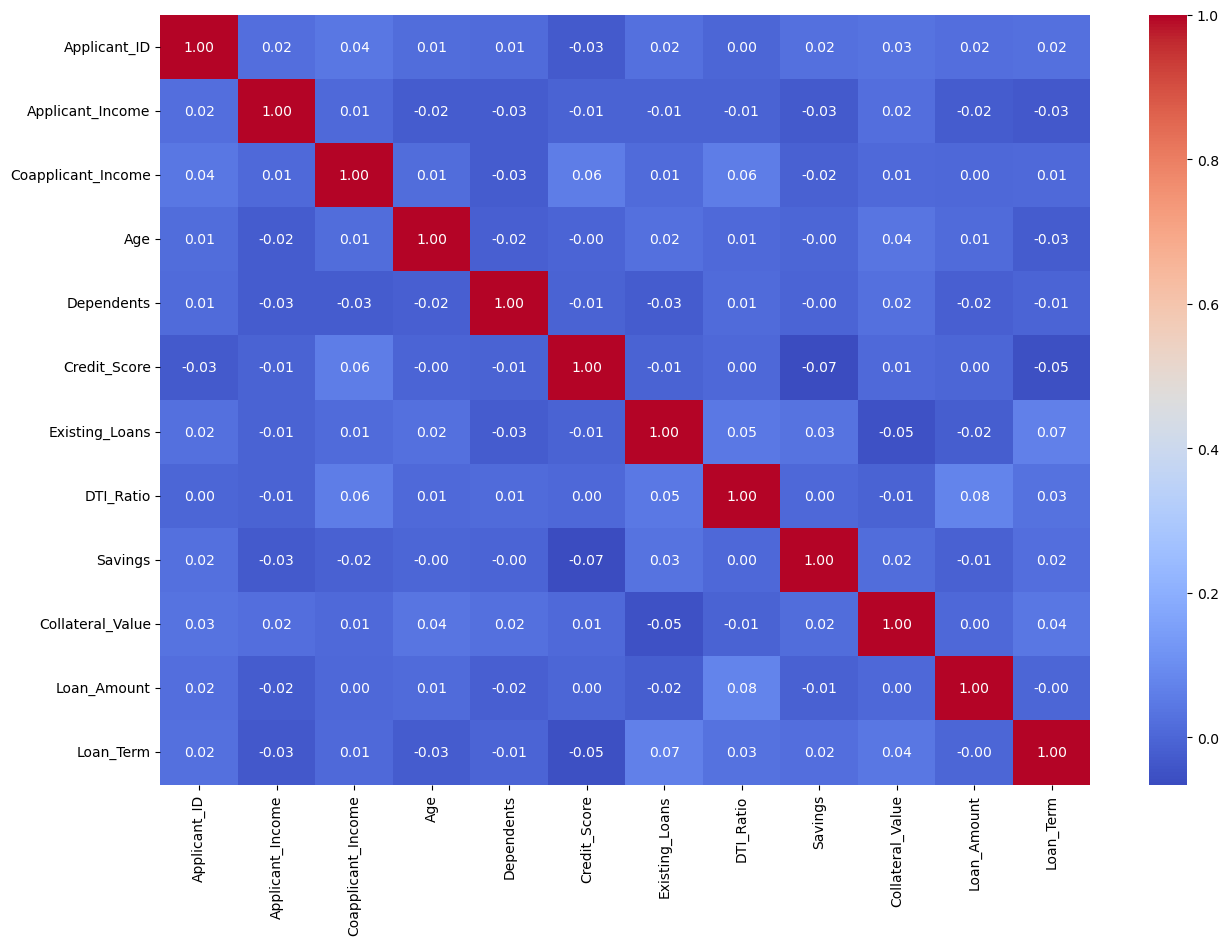

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(
    corr_matrix,
    annot= True,
    cmap = 'coolwarm',
    fmt='.2f'
)